In [246]:
#Social_Network_Ads.csv

**Importing the libraries**

In [247]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import warnings
warnings.simplefilter('ignore')

**Importing the dataset**

In [248]:
df=pd.read_csv('/content/drive/MyDrive/Task7/Assignment11_to_16/Social_Network_Ads.csv')

In [249]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [250]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [251]:
x=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']
x_columns=['Gender','Age','EstimatedSalary']
y_columns=['Not Purchase','Purchase']

In [252]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Feature Scaling**

**Fitting Decision Tree Classification to the Training set**

In [253]:
tree_model=tree.DecisionTreeClassifier()
#tree_model1=tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf=50,max_leaf_nodes=8)
tree_model=tree_model.fit(x_train,y_train)

In [254]:
print('depth of the decision tree :',tree_model.get_depth())
print('leaves of the descision tree :',tree_model.get_n_leaves())

depth of the decision tree : 13
leaves of the descision tree : 44


**Predicting the Test set results**

In [255]:
y_train_predict=tree_model.predict(x_train)

y_test_predict=tree_model.predict(x_test)

In [256]:
print('train accuracy :',accuracy_score(y_train,y_train_predict))
print('test accuracy :',accuracy_score(y_test,y_test_predict))

train accuracy : 0.9964285714285714
test accuracy : 0.875


**Making the Confusion Matrix**

In [257]:
cnf=confusion_matrix(y_train,y_train_predict)
cnf1=confusion_matrix(y_test,y_test_predict)
print(cnf,'\n\n',cnf1)

[[184   0]
 [  1  95]] 

 [[66  7]
 [ 8 39]]


**Visualising the Training set results**

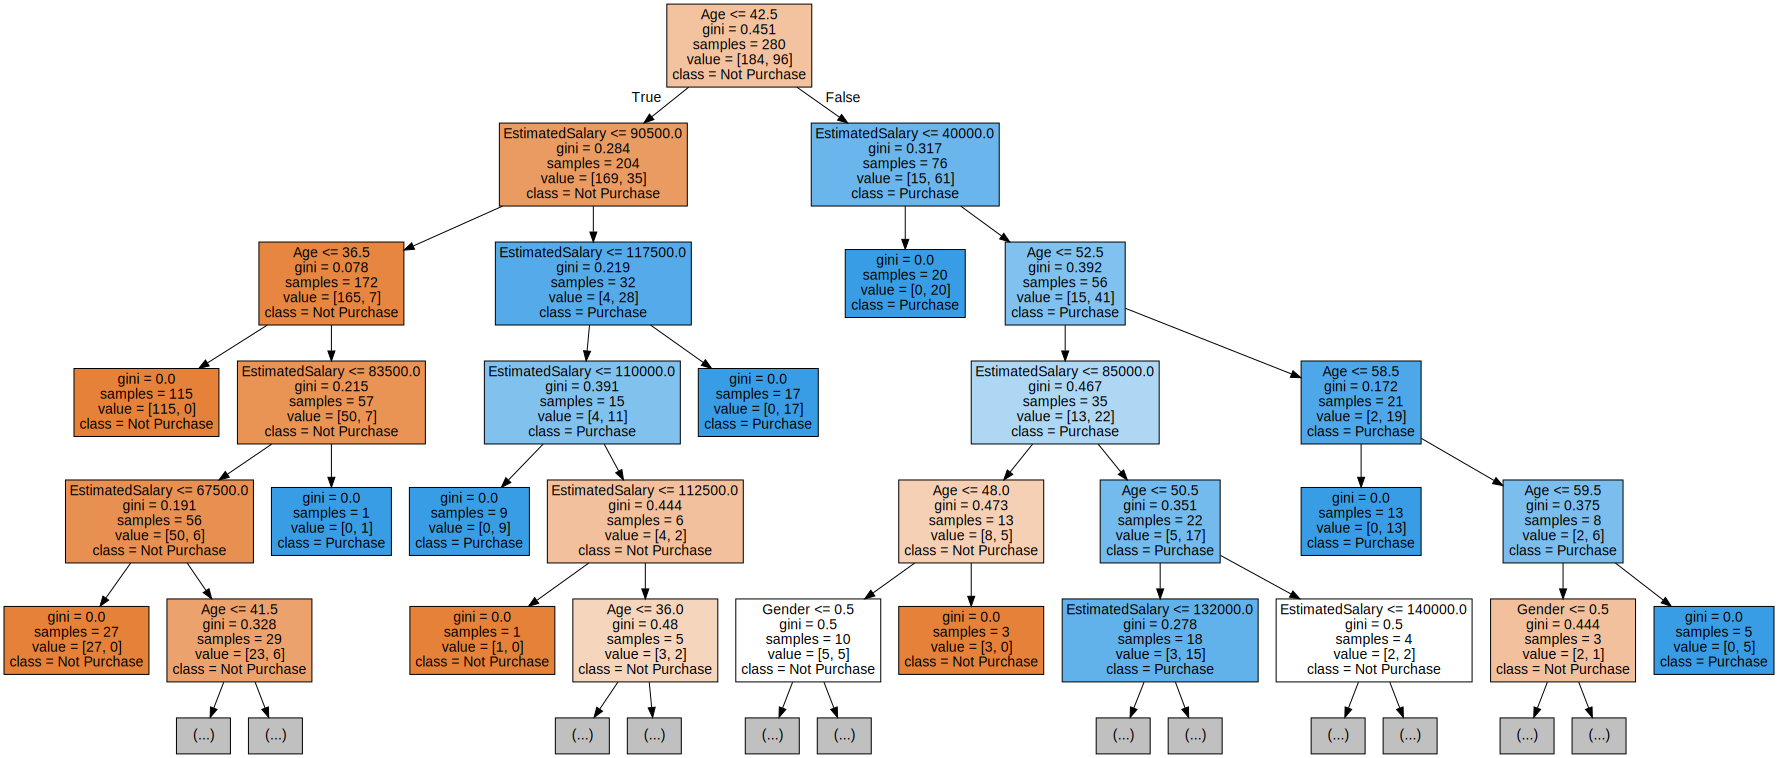

In [258]:
viz=tree.export_graphviz(tree_model,feature_names=x_columns,class_names=y_columns,max_depth=5,filled=True)
graphviz.Source(viz,format='png')


**Visualising the Test set results**

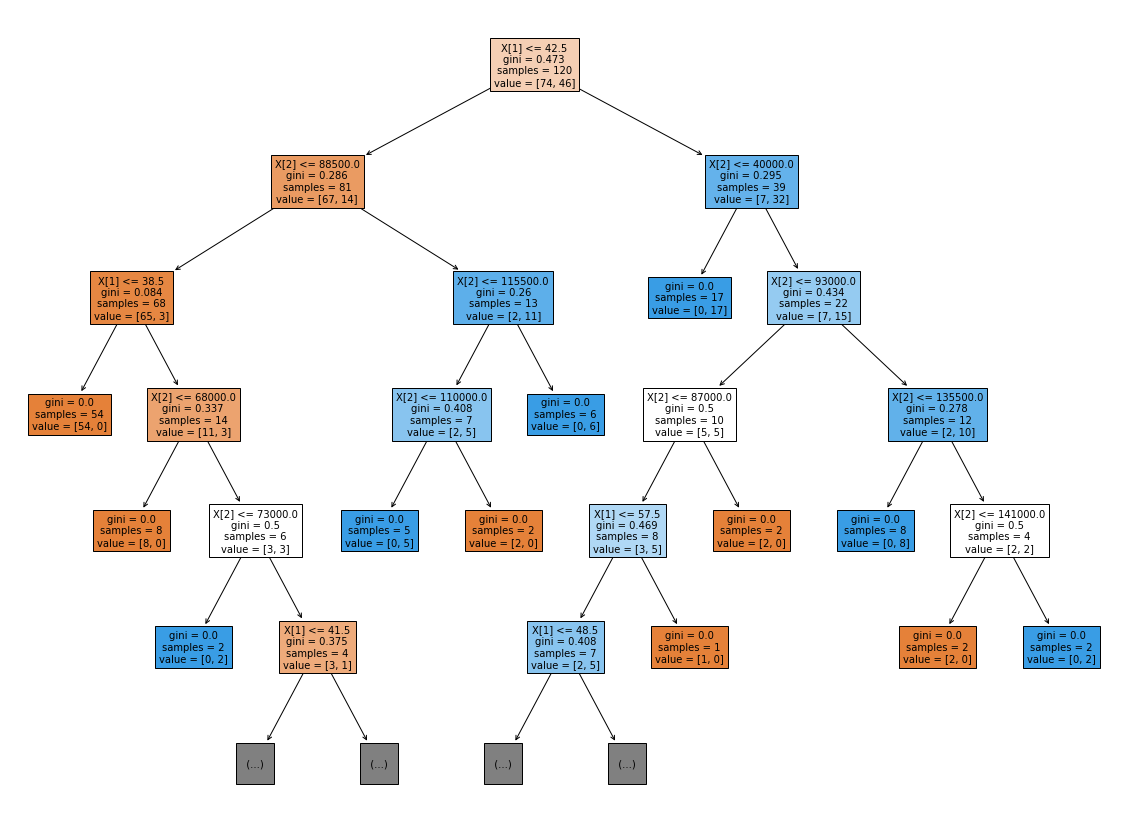

In [259]:
plt.figure(figsize=(20,15))
tree.plot_tree(tree_model.fit(x_test,y_test_predict),max_depth=5,fontsize=10,filled=True) 
plt.show()